# Install libreries 

In [6]:
%pip install gensim nltk pandas seaborn keras
%pip install -U scikit-learn
%pip install tensorflow
%pip install gensim scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('floresta')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk import word_tokenize
from nltk import pos_tag, word_tokenize

import pandas as pd

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package floresta to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package floresta is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Get Datasets from Gitbub

In [8]:
import pandas as pd

def read_and_convert_labels(file_url):
    # Read the file into a pandas DataFrame
    df = pd.read_csv(file_url, sep="\t")

    # Map labels to numerical values
    label_mapping = {'NO': 0, 'NOE': 1, 'OFG': 2, 'OFP': 3}
    df['label_num'] = df['label'].map(label_mapping)

    return df

# Train dataset
train_url = "https://raw.githubusercontent.com/fmplaza/OffendES/main/split_MeOffendES/training_set.tsv"
train_df = read_and_convert_labels(train_url)
print(train_df.head())

# Test dataset
test_url = "https://raw.githubusercontent.com/fmplaza/OffendES/main/split_MeOffendES/test_set.tsv"
test_df = read_and_convert_labels(test_url)
print(test_df.head())

# Validation dataset
val_url = "https://raw.githubusercontent.com/fmplaza/OffendES/main/split_MeOffendES/dev_set.tsv"
val_df = read_and_convert_labels(val_url)
print(val_df.head())


   comment_id                                            comment   
0       52564  En vez de la magia de mi melena, la magia de m...  \
1       32984  A ver, los milenials y la gente normal necesit...   
2       58447  Me encanta todo el contenido que haces se nota...   
3       10341  a Laura sige así que vales mucho más que 10 o ...   
4       53087  Y si no mes gusta Dalas, que hacen aquí,lárgue...   

       influencer influencer_gender      media label  label_num  
0           dalas               man  instagram    NO          0  
1  soyunapringada             woman    youtube    NO          0  
2       wildhater               man  instagram    NO          0  
3     lauraescane             woman    youtube    NO          0  
4           dalas               man  instagram    NO          0  
   comment_id                                           comment influencer   
0       54745                                   Lacasito moreno   wismichu  \
1        5595                    Yo pen

# Normalize data

In [9]:

def clean_text(text):
  text = ' '.join([ word for word in text.split(' ') if not word.startswith('@') ])
  text = re.sub(r"[^A-Za-z ]+", '', text) # keep only letters and spaces
  text = text.strip()
  return text

def remove_stop_words(text):
  stopwords_pt = stopwords.words('spanish')
  text_without_sw = [word for word in text.split(' ') if not word in stopwords_pt]
  return (" ").join(text_without_sw)

def lemmatization_nltk(text):
  lemmatizer = WordNetLemmatizer()
  words = nltk.word_tokenize(text, language='spanish')
  lemmas = [lemmatizer.lemmatize(p).lower() for p in words]
  return (" ").join(lemmas)


def remove_proper_nouns(text):
    words = []
    for word, tag in pos_tag(word_tokenize(text)):
        if tag != 'NNP' and tag != 'NNPS':  # Check for proper nouns tags
            words.append(word)
    return ' '.join(words)


def remove_urls(text):
    # Regular expression pattern to match URLs
    url_pattern = r'https?://\S+|www\.\S+'

    # Remove URLs from the text using the pattern
    text_without_urls = re.sub(url_pattern, '', text)

    return text_without_urls

def normalize_text(text):
  text = remove_urls(text)
  text = clean_text(text)
  text = remove_proper_nouns(text)
  text = text.lower() 
  text = remove_stop_words(text)
  text = lemmatization_nltk(text)

  return text

In [10]:
def normalize_data(df, text_column):
    # Filter DataFrame and remove NaN values
    df_filtered = df[df[text_column].notna()]

    # Normalize text
    df_filtered['comment_clean'] = df_filtered[text_column].apply(normalize_text)

    return df_filtered

train_df = normalize_data(train_df, 'comment')
test_df = normalize_data(test_df, 'comment')
val_df = normalize_data(val_df, 'comment')
def convert_labels(df):
    # Create a new column 'label_num' and initialize with -1
    df['label_num'] = -1

    # Map labels to numerical values
    df.loc[df['label'] == 'NO', 'label_num'] = 0
    df.loc[df['label'] == 'NOE', 'label_num'] = 1
    df.loc[df['label'] == 'OFG', 'label_num'] = 2
    df.loc[df['label'] == 'OFP', 'label_num'] = 3       

    return df
train_df = convert_labels(train_df)
test_df = convert_labels(test_df)
val_df = convert_labels(val_df)

# Balance data for training

212
423
Balanced Train Data size: 30316
Balanced Test Data size: 13606
Balanced val Data size: 100
 Train Data size: 16710
 Test Data size: 13606


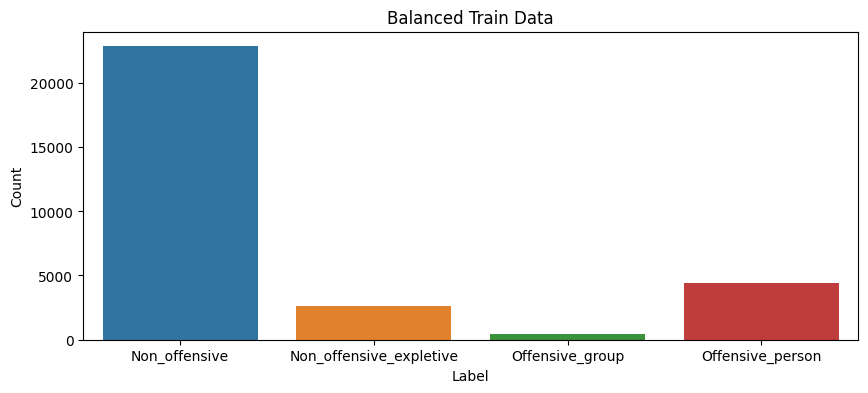

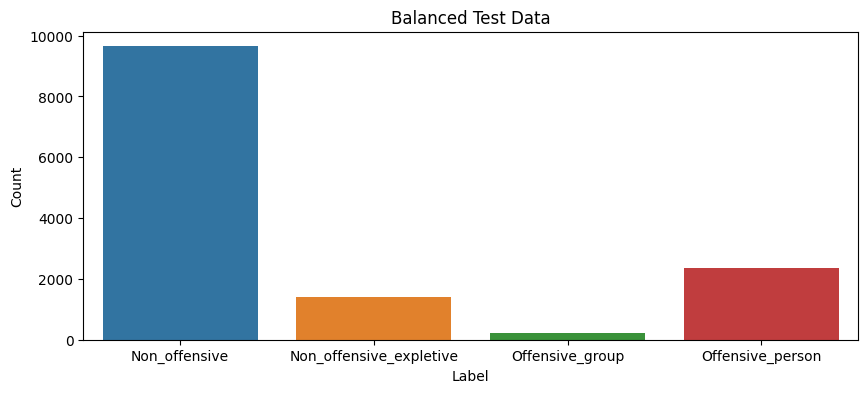

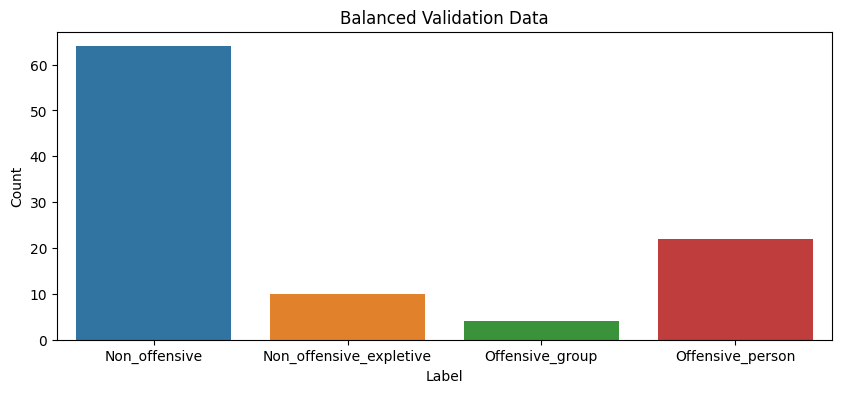

In [12]:

# Get the minimum count among all labels
min_count_train = train_df['label_num'].value_counts().min()
min_count_test = test_df['label_num'].value_counts().min()
print(min_count_train)

# Filter the training data to include an equal number of instances for each label
balanced_train_data = pd.concat([
    train_df[train_df['label_num'] == 0].sample(min_count_train , random_state=16),
    train_df[train_df['label_num'] == 1].sample(min_count_train , random_state=16),
    train_df[train_df['label_num'] == 2].sample(min_count_train , random_state=16),
    train_df[train_df['label_num'] == 3].sample(min_count_train , random_state=16)
])

# Filter the training data to include an equal number of instances for each label
balanced_train_data = pd.concat([
    train_df[train_df['label_num'] == 0],
    train_df[train_df['label_num'] == 1],
    train_df[train_df['label_num'] == 2],
    train_df[train_df['label_num'] == 3]
])

# Filter the test data to include an equal number of instances for each label
balanced_test_data = pd.concat([
    test_df[test_df['label_num'] == 0],
    test_df[test_df['label_num'] == 1],
    test_df[test_df['label_num'] == 2],
    test_df[test_df['label_num'] == 3]
])


# Filter the training data to include an equal number of instances for each label
"""balanced_train_data = pd.concat([
    balanced_train_data[balanced_train_data['label_num'] == 0].sample(min_count_train +2000, random_state=16),
    balanced_train_data[balanced_train_data['label_num'] == 1].sample(min_count_train +2000 , random_state=16),
    balanced_train_data[balanced_train_data['label_num'] == 2].sample(min_count_train , random_state=16),
    balanced_train_data[balanced_train_data['label_num'] == 3].sample(min_count_train +2000 , random_state=16)
])"""
balanced_train_data =  pd.concat([balanced_train_data, balanced_test_data])
min_count_train = balanced_train_data['label_num'].value_counts().min()
print(min_count_train)
# Shuffle the data
balanced_train_data = balanced_train_data.sample(frac=1, random_state=16).reset_index(drop=True)
balanced_test_data = balanced_test_data.sample(frac=1, random_state=16).reset_index(drop=True)

# Print the sizes of the balanced datasets
print("Balanced Train Data size:", len(balanced_train_data))
print("Balanced Test Data size:", len(balanced_test_data))
print("Balanced val Data size:", len(val_df))
# Print the sizes of the balanced datasets
print(" Train Data size:", len(train_df))
print(" Test Data size:", len(test_df))

# Create a bar plot
plt.figure(figsize=(10, 4))
sns.countplot(x='label_num', data=balanced_train_data)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Balanced Train Data')
plt.xticks([0, 1, 2, 3], ['Non_offensive', 'Non_offensive_expletive', 'Offensive_group', 'Offensive_person'])
plt.show()

# Create a bar plot
plt.figure(figsize=(10, 4))
sns.countplot(x='label_num', data=balanced_test_data)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Balanced Test Data')
plt.xticks([0, 1, 2, 3], ['Non_offensive', 'Non_offensive_expletive', 'Offensive_group', 'Offensive_person'])
plt.show()

# Create a bar plot
plt.figure(figsize=(10, 4))
sns.countplot(x='label_num', data=val_df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Balanced Validation Data')
plt.xticks([0, 1, 2, 3], ['Non_offensive', 'Non_offensive_expletive', 'Offensive_group', 'Offensive_person'])
plt.show()

Balanced Train Data size: 3100


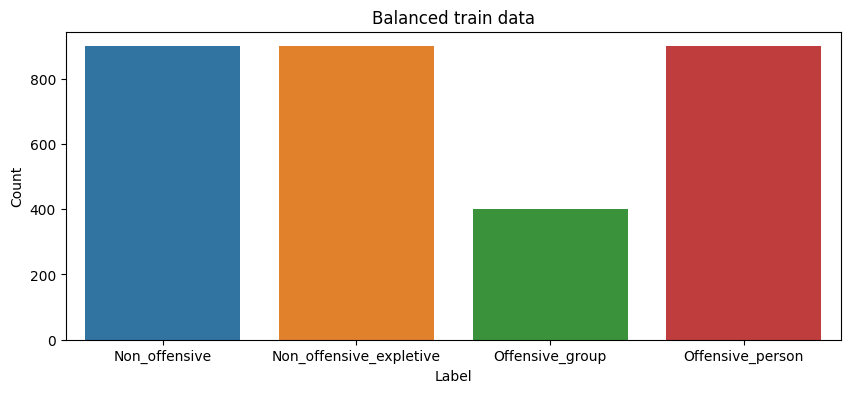

In [13]:
# Get the minimum count among all labels
min_count_train = 400  # Set the desired minimum count for each label

# Filter the training data to include a minimum number of instances for each label
filtered_train_data = pd.concat([
    balanced_train_data[balanced_train_data['label_num'] == 0].sample(min_count_train, random_state=16),
    balanced_train_data[balanced_train_data['label_num'] == 1].sample(min_count_train, random_state=16),
    balanced_train_data[balanced_train_data['label_num'] == 2].sample(min_count_train, random_state=16),
    balanced_train_data[balanced_train_data['label_num'] == 3].sample(min_count_train, random_state=16)
])

# Add 500 more instances to specific labels
extra_train_data = pd.concat([
    balanced_train_data[balanced_train_data['label_num'] == 0].sample(500, random_state=16),
    balanced_train_data[balanced_train_data['label_num'] == 1].sample(500, random_state=16),
    balanced_train_data[balanced_train_data['label_num'] == 3].sample(500, random_state=16)
])

# Combine the two subsets
balanced_train_data = pd.concat([filtered_train_data, extra_train_data])

# Shuffle the data
balanced_train_data = balanced_train_data.sample(frac=1, random_state=16).reset_index(drop=True)

# Print the size of the balanced dataset
print("Balanced Train Data size:", len(balanced_train_data))

# Create a bar plot
plt.figure(figsize=(10, 4))
sns.countplot(x='label_num', data=balanced_train_data)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Balanced train data')
plt.xticks([0, 1, 2, 3], ['Non_offensive', 'Non_offensive_expletive', 'Offensive_group', 'Offensive_person'])
plt.show()


In [15]:
print("Counts of each label_num:")
print(balanced_train_data['label_num'].value_counts())

Counts of each label_num:
label_num
0    900
3    900
1    900
2    400
Name: count, dtype: int64


# Split the data into training and validation sets

In [16]:
from sklearn.utils.class_weight import compute_class_weight

X = balanced_train_data['comment_clean']
y = balanced_train_data['label_num']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print(class_weights_dict)

{0: 0.8611111111111112, 1: 0.8611111111111112, 2: 1.9375, 3: 0.8611111111111112}


# Logistic regression Bag-of-Words & TF-IDF

Bag-of-Words Model:
Accuracy: 0.7989247311827957
Precision: 0.8015458800254814
Recall: 0.7989247311827957
F1 Score: 0.7978127724077936
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.86       270
           1       0.85      0.83      0.84       270
           2       0.64      0.54      0.59       120
           3       0.73      0.86      0.79       270

    accuracy                           0.80       930
   macro avg       0.78      0.76      0.77       930
weighted avg       0.80      0.80      0.80       930

Confusion Matrix:
 [[222  10  13  25]
 [  6 225   9  30]
 [ 15  10  65  30]
 [  6  19  14 231]]
TF-IDF Model:
Accuracy: 0.7838709677419354
Precision: 0.7857035703375471
Recall: 0.7838709677419354
F1 Score: 0.7836058208707879
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84       270
           1       0.87      0.78      0.82     

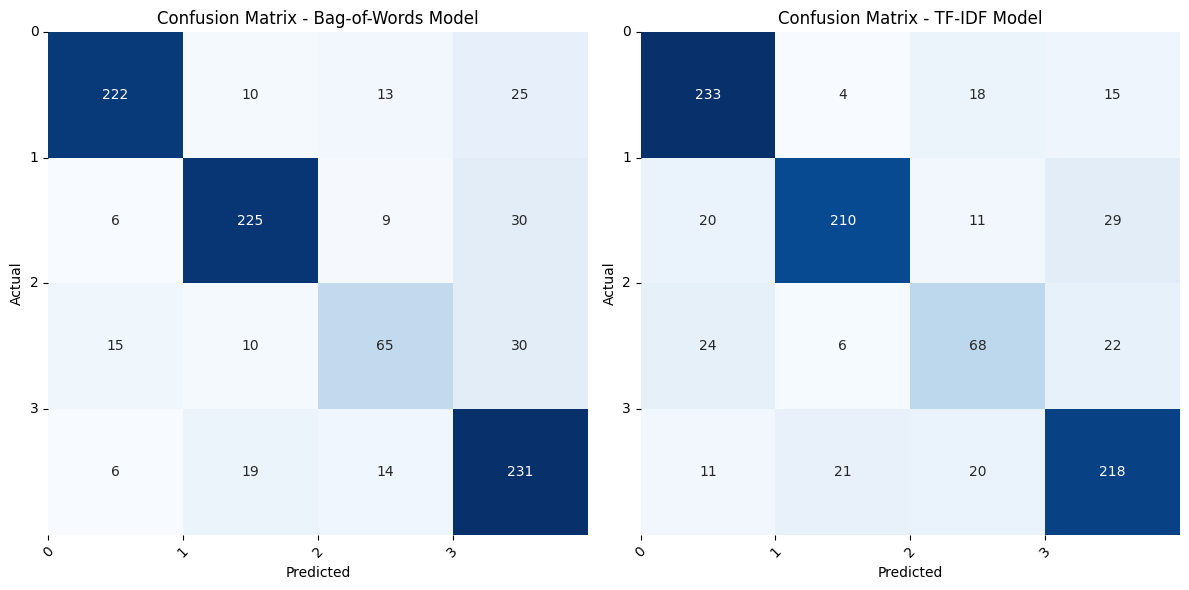

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
import numpy as np

# Create CountVectorizer and TF-IDF Vectorizer with class weights
vectorizer_bow = CountVectorizer(max_features=15000, ngram_range=(1, 2))
vectorizer_tfidf = TfidfVectorizer(max_features=15000, ngram_range=(1, 2))

X_train_bow = vectorizer_bow.fit_transform(X_train)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)

# Train logistic regression classifiers with class weights
classifier_bow = LogisticRegression(class_weight=class_weights_dict, max_iter=1000)  # Increase max_iter to avoid convergence warning
classifier_tfidf = LogisticRegression(class_weight=class_weights_dict, max_iter=1000)

classifier_bow.fit(X_train_bow, y_train)
classifier_tfidf.fit(X_train_tfidf, y_train)

# Evaluate the models
X_val_bow = vectorizer_bow.transform(X_val)
X_val_tfidf = vectorizer_tfidf.transform(X_val)

y_pred_bow = classifier_bow.predict(X_val_bow)
y_pred_tfidf = classifier_tfidf.predict(X_val_tfidf)

accuracy_bow = accuracy_score(y_val, y_pred_bow)
accuracy_tfidf = accuracy_score(y_val, y_pred_tfidf)

class_names = [str(cn) for cn in np.unique(y_train)]  # Convert class names to strings


classification_rep_bow = classification_report(y_val, y_pred_bow, target_names=class_names)
classification_rep_tfidf = classification_report(y_val, y_pred_tfidf, target_names=class_names)

confusion_mat_bow = confusion_matrix(y_val, y_pred_bow)
confusion_mat_tfidf = confusion_matrix(y_val, y_pred_tfidf)

# Calculate precision, recall, and F1-score for Bag-of-Words model
precision_bow = precision_score(y_val, y_pred_bow, average='weighted')
recall_bow = recall_score(y_val, y_pred_bow, average='weighted')
f1_score_bow = f1_score(y_val, y_pred_bow, average='weighted')

# Calculate precision, recall, and F1-score for TF-IDF model
precision_tfidf = precision_score(y_val, y_pred_tfidf, average='weighted')
recall_tfidf = recall_score(y_val, y_pred_tfidf, average='weighted')
f1_score_tfidf = f1_score(y_val, y_pred_tfidf, average='weighted')

print("Bag-of-Words Model:")
print("Accuracy:", accuracy_bow)
print("Precision:", precision_bow)
print("Recall:", recall_bow)
print("F1 Score:", f1_score_bow)
print("Classification Report:\n", classification_rep_bow)
print("Confusion Matrix:\n", confusion_mat_bow)

print("TF-IDF Model:")
print("Accuracy:", accuracy_tfidf)
print("Precision:", precision_tfidf)
print("Recall:", recall_tfidf)
print("F1 Score:", f1_score_tfidf)
print("Classification Report:\n", classification_rep_tfidf)
print("Confusion Matrix:\n", confusion_mat_tfidf)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_mat_bow, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Bag-of-Words Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names, rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(confusion_mat_tfidf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - TF-IDF Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names, rotation=0)

plt.tight_layout()
plt.show()

# SVM Bag-of-Words & TF-IDF

Bag-of-Words Model SVM:
Accuracy: 0.6817204301075269
Precision: 0.7090499447732922
Recall: 0.6817204301075269
F1 Score: 0.6793121755525103
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.68      0.74       270
           1       0.81      0.71      0.75       270
           2       0.65      0.34      0.45       120
           3       0.54      0.81      0.65       270

    accuracy                           0.68       930
   macro avg       0.70      0.63      0.65       930
weighted avg       0.71      0.68      0.68       930

Confusion Matrix:
 [[184   9   7  70]
 [ 11 191   4  64]
 [ 22   8  41  49]
 [ 12  29  11 218]]
TF-IDF Model SVM:
Accuracy: 0.8086021505376344
Precision: 0.8103912560031094
Recall: 0.8086021505376344
F1 Score: 0.8000852403158272
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.85       270
           1       0.83      0.82      0

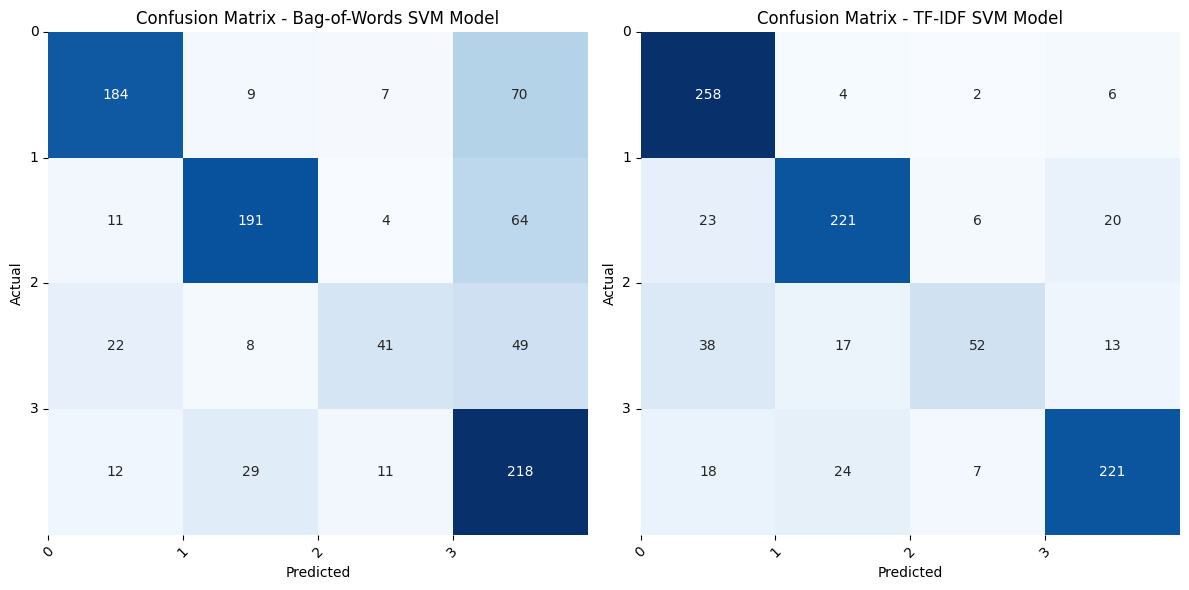

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import numpy as np


#  Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Create CountVectorizer and TF-IDF Vectorizer with class weights
vectorizer_bow = CountVectorizer(max_features=15000, ngram_range=(1, 2))
vectorizer_tfidf = TfidfVectorizer(max_features=15000, ngram_range=(1, 2))

X_train_bow = vectorizer_bow.fit_transform(X_train)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)

#Train SVM classifiers with class weights
classifier_bow = SVC(class_weight=class_weights_dict)
classifier_tfidf = SVC(class_weight=class_weights_dict)

classifier_bow.fit(X_train_bow, y_train)
classifier_tfidf.fit(X_train_tfidf, y_train)

# Evaluate the models
X_val_bow = vectorizer_bow.transform(X_val)
X_val_tfidf = vectorizer_tfidf.transform(X_val)

y_pred_bow = classifier_bow.predict(X_val_bow)
y_pred_tfidf = classifier_tfidf.predict(X_val_tfidf)

accuracy_bow = accuracy_score(y_val, y_pred_bow)
accuracy_tfidf = accuracy_score(y_val, y_pred_tfidf)

# Convert class names to strings
class_names = [str(cn) for cn in np.unique(y_train)] 

classification_rep_bow = classification_report(y_val, y_pred_bow, target_names=class_names)
classification_rep_tfidf = classification_report(y_val, y_pred_tfidf, target_names=class_names)

confusion_mat_bow = confusion_matrix(y_val, y_pred_bow)
confusion_mat_tfidf = confusion_matrix(y_val, y_pred_tfidf)

# Calculate precision, recall, and F1-score for Bag-of-Words model
precision_bow = precision_score(y_val, y_pred_bow, average='weighted')
recall_bow = recall_score(y_val, y_pred_bow, average='weighted')
f1_score_bow = f1_score(y_val, y_pred_bow, average='weighted')

# Calculate precision, recall, and F1-score for TF-IDF model
precision_tfidf = precision_score(y_val, y_pred_tfidf, average='weighted')
recall_tfidf = recall_score(y_val, y_pred_tfidf, average='weighted')
f1_score_tfidf = f1_score(y_val, y_pred_tfidf, average='weighted')

print("Bag-of-Words Model SVM:")
print("Accuracy:", accuracy_bow)
print("Precision:", precision_bow)
print("Recall:", recall_bow)
print("F1 Score:", f1_score_bow)
print("Classification Report:\n", classification_rep_bow)
print("Confusion Matrix:\n", confusion_mat_bow)

print("TF-IDF Model SVM:")
print("Accuracy:", accuracy_tfidf)
print("Precision:", precision_tfidf)
print("Recall:", recall_tfidf)
print("F1 Score:", f1_score_tfidf)
print("Classification Report:\n", classification_rep_tfidf)
print("Confusion Matrix:\n", confusion_mat_tfidf)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_mat_bow, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Bag-of-Words SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names, rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(confusion_mat_tfidf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - TF-IDF SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names, rotation=0)

plt.tight_layout()
plt.show()

# Word2vec 

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
import nltk
nltk.download('punkt') 


# Create class weights
X = balanced_train_data['comment_clean']
y = balanced_train_data['label_num']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train phrase models to detect common bigram phrases (optional but can improve results)
phrases = Phrases(balanced_train_data['comment_clean'], min_count=5, threshold=10)
bigram = Phraser(phrases)
sentences = bigram[balanced_train_data['comment_clean']]
# Train Word2Vec model
model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0, workers=4)  # Adjust parameters as needed

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Class Weights:", class_weights_dict)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Class Weights: {0: 0.8611111111111112, 1: 0.8611111111111112, 2: 1.9375, 3: 0.8611111111111112}


Logistic Regresion

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Word2Vec Model:
Accuracy: 0.3161290322580645
Precision: 0.3201083108745182
Recall: 0.3161290322580645
F1 Score: 0.2693101461479437
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.08      0.13       270
           1       0.32      0.59      0.41       270
           2       0.22      0.04      0.07       120
           3       0.31      0.40      0.35       270

    accuracy                           0.32       930
   macro avg       0.31      0.28      0.24       930
weighted avg       0.32      0.32      0.27       930

Confusion Matrix:
 [[ 22 132   5 111]
 [ 13 158   3  96]
 [  6  69   5  40]
 [ 17 134  10 109]]


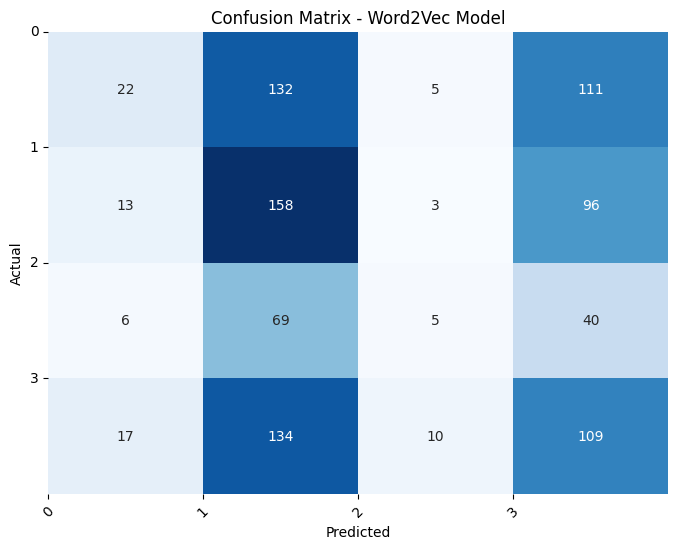

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Train a Word2Vec model
nltk.download('punkt')
sentences = [word_tokenize(comment) for comment in X_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)
# Step 3: Generate Word2Vec embeddings
def generate_word_embeddings(data, w2v_model):
    embeddings = []

    for sentence in data:
        words = sentence.split()

        sentence_embeddings = []

        for word in words:
            if word in w2v_model.wv:
                sentence_embeddings.append(w2v_model.wv[word])

        if sentence_embeddings:
            sentence_mean_embedding = np.mean(sentence_embeddings, axis=0)
            embeddings.append(sentence_mean_embedding)
        else:
            embeddings.append(np.zeros(w2v_model.vector_size))

    return np.array(embeddings)

X_train_w2v = generate_word_embeddings(X_train, w2v_model)


# Train a logistic regression classifier with class weights using Word2Vec embeddings
classifier_w2v = LogisticRegression(class_weight=class_weights_dict)
classifier_w2v.fit(X_train_w2v, y_train)  # X_train_w2v should be your Word2Vec embeddings

# Evaluate the model using Word2Vec embeddings
X_val_w2v = generate_word_embeddings(X_val, w2v_model)  # Replace this with your actual function to generate embeddings
y_pred_w2v = classifier_w2v.predict(X_val_w2v)

accuracy_w2v = accuracy_score(y_val, y_pred_w2v)
precision_w2v = precision_score(y_val, y_pred_w2v, average='weighted')
recall_w2v = recall_score(y_val, y_pred_w2v, average='weighted')
f1_score_w2v = f1_score(y_val, y_pred_w2v, average='weighted')

classification_rep_w2v = classification_report(y_val, y_pred_w2v, target_names=class_names)
confusion_mat_w2v = confusion_matrix(y_val, y_pred_w2v)

print("Word2Vec Model:")
print("Accuracy:", accuracy_w2v)
print("Precision:", precision_w2v)
print("Recall:", recall_w2v)
print("F1 Score:", f1_score_w2v)
print("Classification Report:\n", classification_rep_w2v)
print("Confusion Matrix:\n", confusion_mat_w2v)
# Plot confusion matrix
def plot_confusion_matrix(confusion_matrix, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
    plt.yticks(np.arange(len(class_names)), class_names, rotation=0)
    plt.show()
    
# Plot confusion matrix for Word2Vec model
plot_confusion_matrix(confusion_mat_w2v, class_names, 'Confusion Matrix - Word2Vec Model')

SVM

X_train_w2v shape: (2170, 100)
X_val_w2v shape: (930, 100)
Word2Vec SVM Model:
Accuracy: 0.33978494623655914
Precision: 0.41319431881389973
Recall: 0.33978494623655914
F1 Score: 0.26697763636571054
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.21      0.28       270
           1       0.32      0.86      0.47       270
           2       0.17      0.07      0.10       120
           3       0.58      0.07      0.12       270

    accuracy                           0.34       930
   macro avg       0.38      0.30      0.24       930
weighted avg       0.41      0.34      0.27       930

Confusion Matrix:
 [[ 56 186  20   8]
 [ 20 233  13   4]
 [ 19  91   9   1]
 [ 31 209  12  18]]


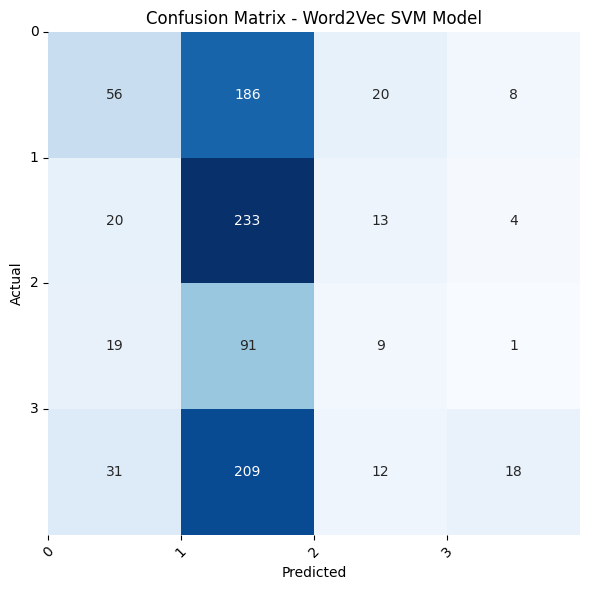

In [33]:
import numpy as np
import gensim
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

def get_sentence_embeddings(sentences, model):
    embeddings = []
    for sentence in sentences:
        words = sentence.split() 
        word_embeddings = [model.wv[word] for word in words if word in model.wv]
        if word_embeddings:
            sentence_embedding = np.mean(word_embeddings, axis=0)
        else:
            sentence_embedding = np.zeros(model.vector_size)
        embeddings.append(sentence_embedding)
    return np.array(embeddings)


X_train_w2v = get_sentence_embeddings(X_train, model_w2v)
X_val_w2v = get_sentence_embeddings(X_val, model_w2v)

print("X_train_w2v shape:", X_train_w2v.shape)
print("X_val_w2v shape:", X_val_w2v.shape)

# Train SVM classifiers with class weights
classifier_w2v = SVC(class_weight=class_weights_dict)

classifier_w2v.fit(X_train_w2v, y_train)

# Evaluate the Word2Vec SVM model
y_pred_w2v = classifier_w2v.predict(X_val_w2v)

accuracy_w2v = accuracy_score(y_val, y_pred_w2v)
precision_w2v = precision_score(y_val, y_pred_w2v, average='weighted')
recall_w2v = recall_score(y_val, y_pred_w2v, average='weighted')
f1_score_w2v = f1_score(y_val, y_pred_w2v, average='weighted')

class_names = [str(cn) for cn in np.unique(y_train)]

classification_rep_w2v = classification_report(y_val, y_pred_w2v, target_names=class_names)
confusion_mat_w2v = confusion_matrix(y_val, y_pred_w2v)

print("Word2Vec SVM Model:")
print("Accuracy:", accuracy_w2v)
print("Precision:", precision_w2v)
print("Recall:", recall_w2v)
print("F1 Score:", f1_score_w2v)
print("Classification Report:\n", classification_rep_w2v)
print("Confusion Matrix:\n", confusion_mat_w2v)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat_w2v, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Word2Vec SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names, rotation=0)
plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


SVM Model using Word2Vec:
Accuracy: 0.33978494623655914
Precision: 0.41319431881389973
Recall: 0.33978494623655914
F1 Score: 0.26697763636571054
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.21      0.28       270
           1       0.32      0.86      0.47       270
           2       0.17      0.07      0.10       120
           3       0.58      0.07      0.12       270

    accuracy                           0.34       930
   macro avg       0.38      0.30      0.24       930
weighted avg       0.41      0.34      0.27       930

Confusion Matrix:
 [[ 56 186  20   8]
 [ 20 233  13   4]
 [ 19  91   9   1]
 [ 31 209  12  18]]


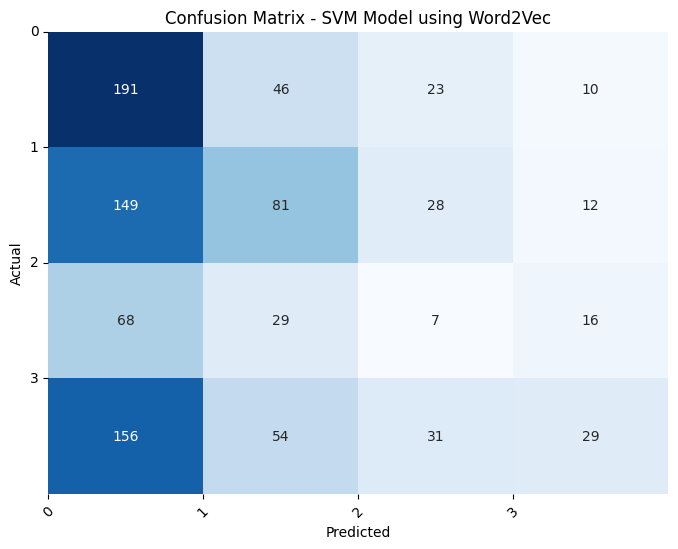

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.svm import SVC
import numpy as np
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

#Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Train a Word2Vec model
nltk.download('punkt')
sentences = [word_tokenize(comment) for comment in X_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

# Generate Word2Vec embeddings
def generate_word_embeddings(data, w2v_model):
    embeddings = []

    for sentence in data:
        words = word_tokenize(sentence)

        sentence_embeddings = []

        for word in words:
            if word in w2v_model.wv:
                sentence_embeddings.append(w2v_model.wv[word])

        if sentence_embeddings:
            sentence_mean_embedding = np.mean(sentence_embeddings, axis=0)
            embeddings.append(sentence_mean_embedding)
        else:
            embeddings.append(np.zeros(w2v_model.vector_size))

    return np.array(embeddings)

X_train_w2v = generate_word_embeddings(X_train, w2v_model)
X_val_w2v = generate_word_embeddings(X_val, w2v_model)

# Create an SVM classifier using Word2Vec embeddings
classifier_svm = SVC(class_weight=class_weights_dict, random_state=42)
classifier_svm.fit(X_train_w2v, y_train)

# Evaluate SVM
y_pred_svm = classifier_svm.predict(X_val_w2v)

accuracy_w2v = accuracy_score(y_val, y_pred_w2v)
precision_w2v = precision_score(y_val, y_pred_w2v, average='weighted')
recall_w2v = recall_score(y_val, y_pred_w2v, average='weighted')
f1_score_w2v = f1_score(y_val, y_pred_w2v, average='weighted')

class_names = [str(cn) for cn in np.unique(y_train)]

classification_rep_w2v = classification_report(y_val, y_pred_w2v, target_names=class_names)
confusion_mat_w2v = confusion_matrix(y_val, y_pred_w2v)

print("SVM Model using Word2Vec:")
print("Accuracy:", accuracy_w2v)
print("Precision:", precision_w2v)
print("Recall:", recall_w2v)
print("F1 Score:", f1_score_w2v)
print("Classification Report:\n", classification_rep_w2v)
print("Confusion Matrix:\n", confusion_mat_w2v)

# Plot confusion matrix for SVM model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM Model using Word2Vec')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names, rotation=0)
plt.show()


# Descion Tree & Random Forest

Bag of Words & TF-IDF

Bag-of-Words Random Forest Model:
Accuracy: 0.7913978494623656
Precision: 0.7856989145347121
Recall: 0.7913978494623656
F1 Score: 0.7819489497333301
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       270
           1       0.76      0.91      0.83       270
           2       0.66      0.38      0.48       120
           3       0.81      0.79      0.80       270

    accuracy                           0.79       930
   macro avg       0.77      0.73      0.74       930
weighted avg       0.79      0.79      0.78       930

Confusion Matrix:
 [[233  12   9  16]
 [  4 245   6  15]
 [ 24  31  46  19]
 [ 15  34   9 212]]
TF-IDF Random Forest Model:
Accuracy: 0.7870967741935484
Precision: 0.7847076805792049
Recall: 0.7870967741935484
F1 Score: 0.7799400632851471
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       270
           1       0

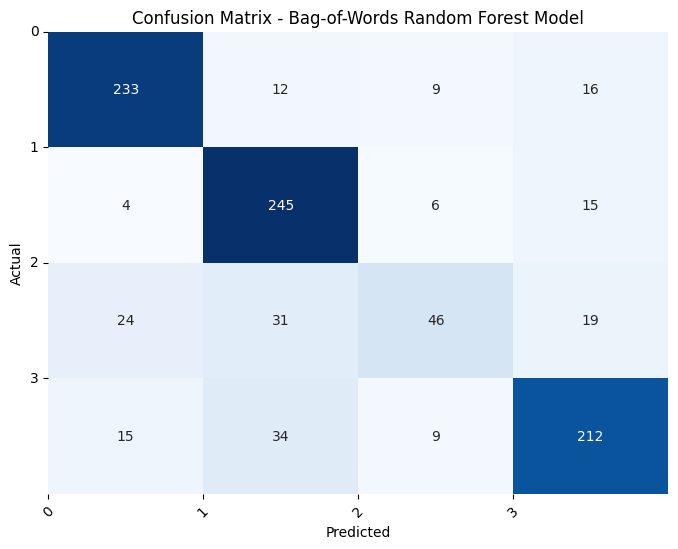

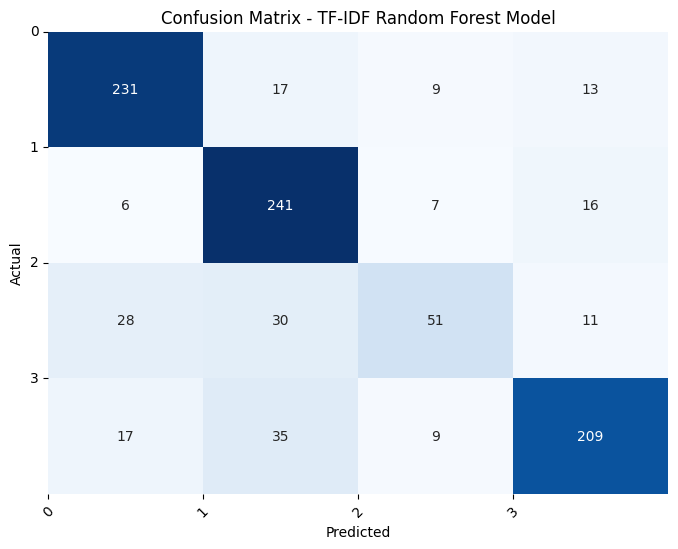

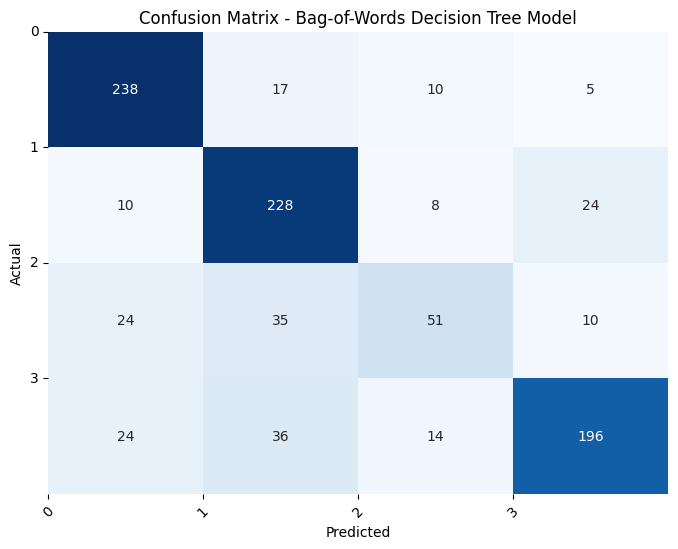

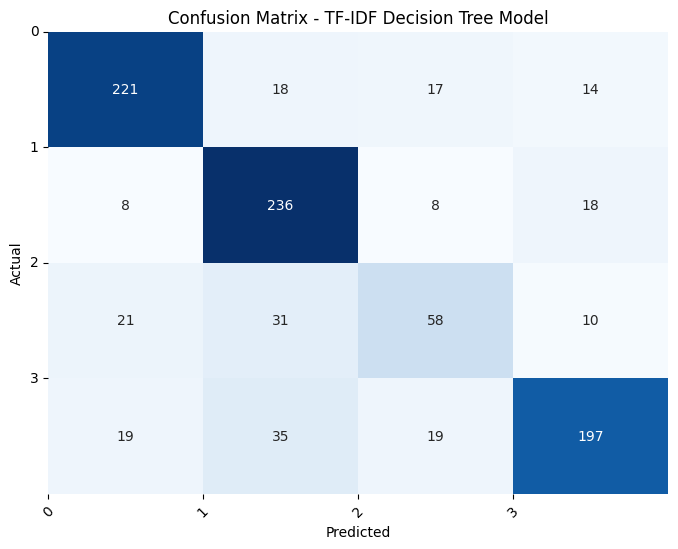

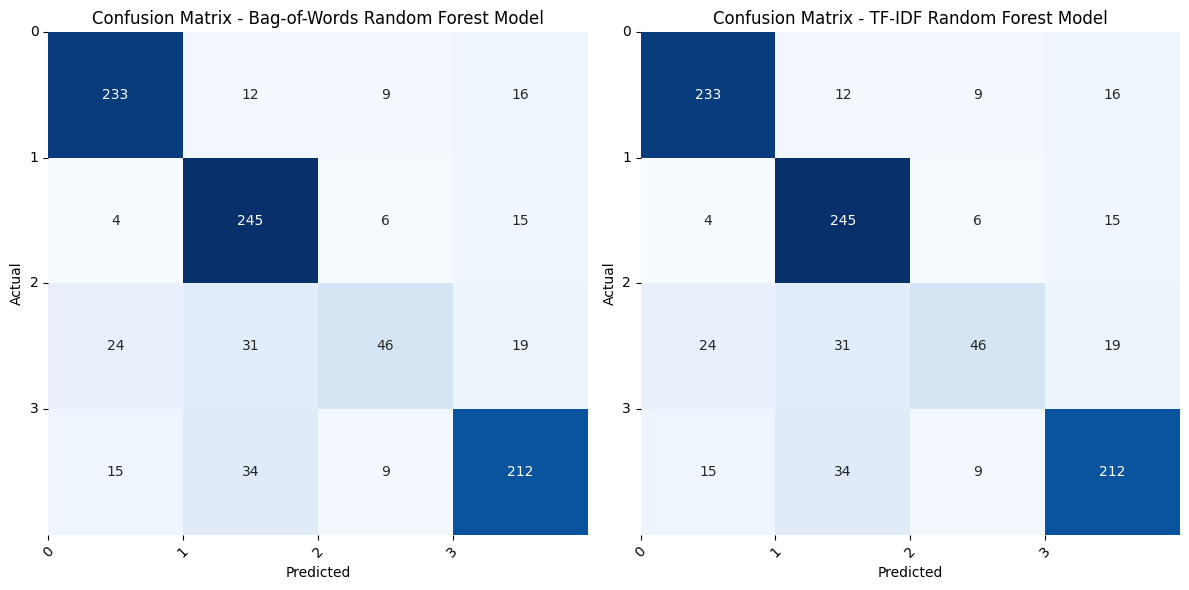

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import numpy as np


# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Create CountVectorizer and TF-IDF Vectorizer with class weights
vectorizer_bow = CountVectorizer(max_features=15000, ngram_range=(1, 2))
vectorizer_tfidf = TfidfVectorizer(max_features=15000, ngram_range=(1, 2))

X_train_bow = vectorizer_bow.fit_transform(X_train)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)

# Train Random Forest and Decision Tree classifiers with class weights
classifier_bow_rf = RandomForestClassifier(class_weight=class_weights_dict)
classifier_tfidf_rf = RandomForestClassifier(class_weight=class_weights_dict)
classifier_bow_dt = DecisionTreeClassifier(class_weight=class_weights_dict)
classifier_tfidf_dt = DecisionTreeClassifier(class_weight=class_weights_dict)

classifier_bow_rf.fit(X_train_bow, y_train)
classifier_tfidf_rf.fit(X_train_tfidf, y_train)
classifier_bow_dt.fit(X_train_bow, y_train)
classifier_tfidf_dt.fit(X_train_tfidf, y_train)

# Evaluate the models
X_val_bow = vectorizer_bow.transform(X_val)
X_val_tfidf = vectorizer_tfidf.transform(X_val)

y_pred_bow_rf = classifier_bow_rf.predict(X_val_bow)
y_pred_tfidf_rf = classifier_tfidf_rf.predict(X_val_tfidf)
y_pred_bow_dt = classifier_bow_dt.predict(X_val_bow)
y_pred_tfidf_dt = classifier_tfidf_dt.predict(X_val_tfidf)

accuracy_bow_rf = accuracy_score(y_val, y_pred_bow_rf)
accuracy_tfidf_rf = accuracy_score(y_val, y_pred_tfidf_rf)
accuracy_bow_dt = accuracy_score(y_val, y_pred_bow_dt)
accuracy_tfidf_dt = accuracy_score(y_val, y_pred_tfidf_dt)

precision_bow_rf = precision_score(y_val, y_pred_bow_rf, average='weighted')
precision_tfidf_rf = precision_score(y_val, y_pred_tfidf_rf, average='weighted')
precision_bow_dt = precision_score(y_val, y_pred_bow_dt, average='weighted')
precision_tfidf_dt = precision_score(y_val, y_pred_tfidf_dt, average='weighted')

recall_bow_rf = recall_score(y_val, y_pred_bow_rf, average='weighted')
recall_tfidf_rf = recall_score(y_val, y_pred_tfidf_rf, average='weighted')
recall_bow_dt = recall_score(y_val, y_pred_bow_dt, average='weighted')
recall_tfidf_dt = recall_score(y_val, y_pred_tfidf_dt, average='weighted')

f1_bow_rf = f1_score(y_val, y_pred_bow_rf, average='weighted')
f1_tfidf_rf = f1_score(y_val, y_pred_tfidf_rf, average='weighted')
f1_bow_dt = f1_score(y_val, y_pred_bow_dt, average='weighted')
f1_tfidf_dt = f1_score(y_val, y_pred_tfidf_dt, average='weighted')

class_names = [str(cn) for cn in np.unique(y_train)]

classification_rep_bow_rf = classification_report(y_val, y_pred_bow_rf, target_names=class_names)
classification_rep_tfidf_rf = classification_report(y_val, y_pred_tfidf_rf, target_names=class_names)
classification_rep_bow_dt = classification_report(y_val, y_pred_bow_dt, target_names=class_names)
classification_rep_tfidf_dt = classification_report(y_val, y_pred_tfidf_dt, target_names=class_names)

confusion_mat_bow_rf = confusion_matrix(y_val, y_pred_bow_rf)
confusion_mat_tfidf_rf = confusion_matrix(y_val, y_pred_tfidf_rf)
confusion_mat_bow_dt = confusion_matrix(y_val, y_pred_bow_dt)
confusion_mat_tfidf_dt = confusion_matrix(y_val, y_pred_tfidf_dt)

print("Bag-of-Words Random Forest Model:")
print("Accuracy:", accuracy_bow_rf)
print("Precision:", precision_bow_rf)
print("Recall:", recall_bow_rf)
print("F1 Score:", f1_bow_rf)
print("Classification Report:\n", classification_rep_bow_rf)
print("Confusion Matrix:\n", confusion_mat_bow_rf)

print("TF-IDF Random Forest Model:")
print("Accuracy:", accuracy_tfidf_rf)
print("Precision:", precision_tfidf_rf)
print("Recall:", recall_tfidf_rf)
print("F1 Score:", f1_tfidf_rf)
print("Classification Report:\n", classification_rep_tfidf_rf)
print("Confusion Matrix:\n", confusion_mat_tfidf_rf)

print("Bag-of-Words Decision Tree Model:")
print("Accuracy:", accuracy_bow_dt)
print("Precision:", precision_bow_dt)
print("Recall:", recall_bow_dt)
print("F1 Score:", f1_bow_dt)
print("Classification Report:\n", classification_rep_bow_dt)
print("Confusion Matrix:\n", confusion_mat_bow_dt)

print("TF-IDF Decision Tree Model:")
print("Accuracy:", accuracy_tfidf_dt)
print("Precision:", precision_tfidf_dt)
print("Recall:", recall_tfidf_dt)
print("F1 Score:", f1_tfidf_dt)
print("Classification Report:\n", classification_rep_tfidf_dt)
print("Confusion Matrix:\n", confusion_mat_tfidf_dt)
# Plot confusion matrices
def plot_confusion_matrix(confusion_matrix, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
    plt.yticks(np.arange(len(class_names)), class_names, rotation=0)
    plt.show()
    
# Plot confusion matrices for Random Forest models
plot_confusion_matrix(confusion_mat_bow_rf, class_names, 'Confusion Matrix - Bag-of-Words Random Forest Model')
plot_confusion_matrix(confusion_mat_tfidf_rf, class_names, 'Confusion Matrix - TF-IDF Random Forest Model')

# Plot confusion matrices for Decision Tree models
plot_confusion_matrix(confusion_mat_bow_dt, class_names, 'Confusion Matrix - Bag-of-Words Decision Tree Model')
plot_confusion_matrix(confusion_mat_tfidf_dt, class_names, 'Confusion Matrix - TF-IDF Decision Tree Model')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_mat_bow_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Bag-of-Words Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names, rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(confusion_mat_bow_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - TF-IDF Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names, rotation=0)

plt.tight_layout()
plt.show()



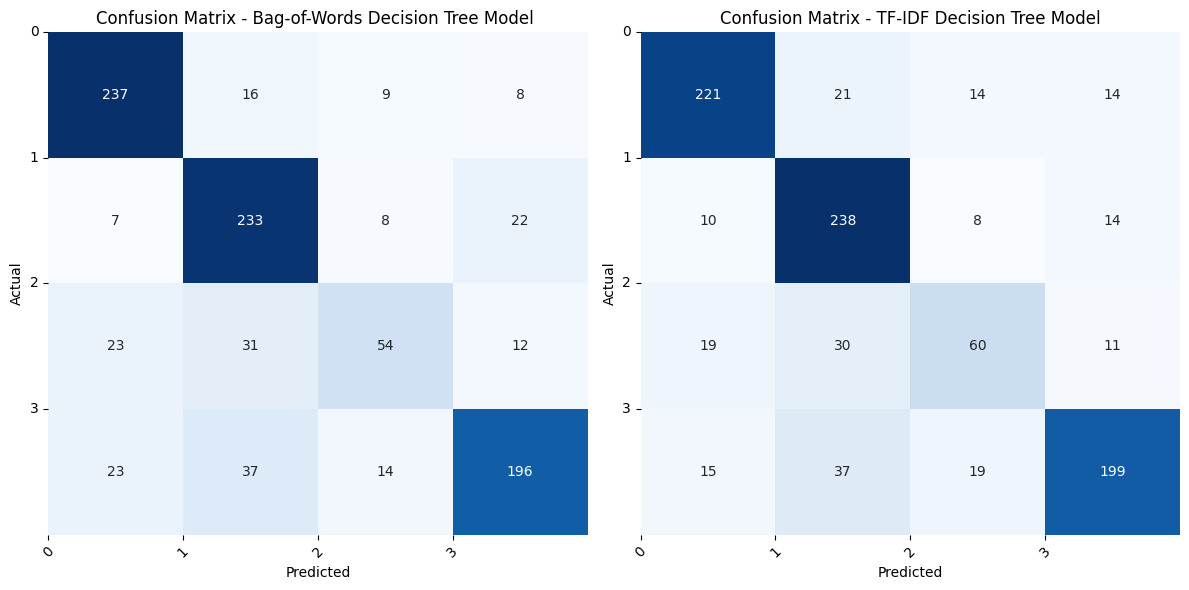

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_mat_bow_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Bag-of-Words Decision Tree Model ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names, rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(confusion_mat_tfidf_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - TF-IDF Decision Tree Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names, rotation=0)

plt.tight_layout()
plt.show()

Word2vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Decision Tree Model using Word2Vec:
Accuracy: 0.678494623655914
Precision: 0.6642028869615129
Recall: 0.678494623655914
F1 Score: 0.6680327081074937
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76       270
           1       0.67      0.77      0.72       270
           2       0.29      0.19      0.23       120
           3       0.69      0.76      0.72       270

    accuracy                           0.68       930
   macro avg       0.61      0.61      0.61       930
weighted avg       0.66      0.68      0.67       930

Confusion Matrix:
 [[196  24  22  28]
 [ 12 208  22  28]
 [ 21  39  23  37]
 [ 17  38  11 204]]
Random Forest Model using Word2Vec:
Accuracy: 0.6849462365591398
Precision: 0.6468601329677197
Recall: 0.6849462365591398
F1 Score: 0.6472412167846003
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.76       270
           1

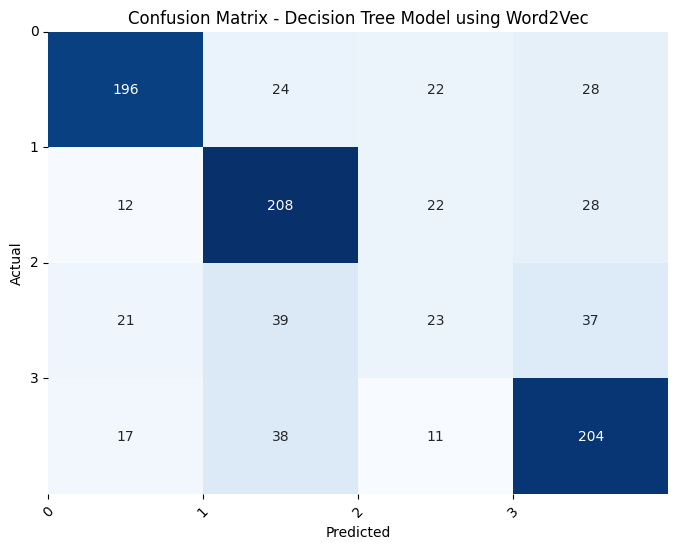

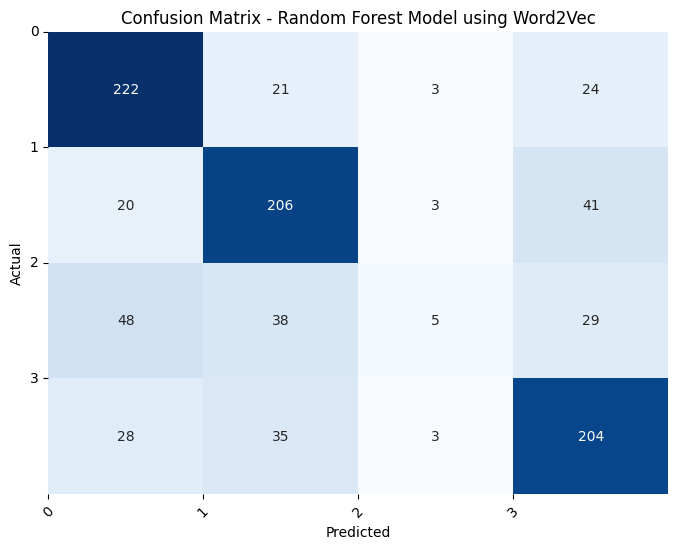

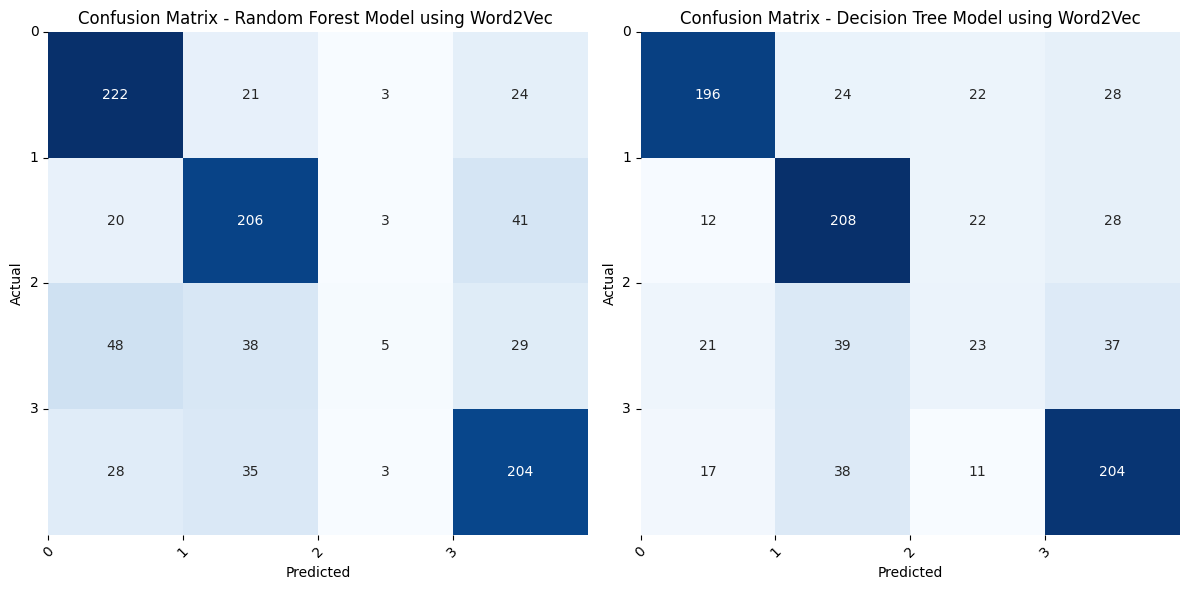

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Train a Word2Vec model
nltk.download('punkt')
sentences = [word_tokenize(comment) for comment in X_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

# Generate Word2Vec embeddings
def generate_word_embeddings(data, w2v_model):
    embeddings = []

    for sentence in data:
        words = word_tokenize(sentence)

        sentence_embeddings = []

        for word in words:
            if word in w2v_model.wv:
                sentence_embeddings.append(w2v_model.wv[word])

        if sentence_embeddings:
            sentence_mean_embedding = np.mean(sentence_embeddings, axis=0)
            embeddings.append(sentence_mean_embedding)
        else:
            embeddings.append(np.zeros(w2v_model.vector_size))

    return np.array(embeddings)

X_train_w2v = generate_word_embeddings(X_train, w2v_model)
X_val_w2v = generate_word_embeddings(X_val, w2v_model)

# Create a Decision Tree classifier using Word2Vec embeddings
classifier_dt = DecisionTreeClassifier(class_weight=class_weights_dict, random_state=42)
classifier_dt.fit(X_train_w2v, y_train)

# Create a Random Forest classifier using Word2Vec embeddings
classifier_rf = RandomForestClassifier(class_weight=class_weights_dict, random_state=42)
classifier_rf.fit(X_train_w2v, y_train)

y_pred_dt = classifier_dt.predict(X_val_w2v)

accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt, average='weighted')
recall_dt = recall_score(y_val, y_pred_dt, average='weighted')
f1_dt = f1_score(y_val, y_pred_dt, average='weighted')

classification_rep_dt = classification_report(y_val, y_pred_dt, target_names=class_names)
confusion_mat_dt = confusion_matrix(y_val, y_pred_dt)

print("Decision Tree Model using Word2Vec:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("Classification Report:\n", classification_rep_dt)
print("Confusion Matrix:\n", confusion_mat_dt)

# Evaluate Random Forest
y_pred_rf = classifier_rf.predict(X_val_w2v)

accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf, average='weighted')
recall_rf = recall_score(y_val, y_pred_rf, average='weighted')
f1_rf = f1_score(y_val, y_pred_rf, average='weighted')

classification_rep_rf = classification_report(y_val, y_pred_rf, target_names=class_names)
confusion_mat_rf = confusion_matrix(y_val, y_pred_rf)

print("Random Forest Model using Word2Vec:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:\n", classification_rep_rf)
print("Confusion Matrix:\n", confusion_mat_rf)

# Plot confusion matrix for Decision Tree model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree Model using Word2Vec')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names, rotation=0)
plt.show()

# Plot confusion matrix for Random Forest model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Model using Word2Vec')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names, rotation=0)
plt.show()


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_mat_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Model using Word2Vec ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names, rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(confusion_mat_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree Model using Word2Vec')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names, rotation=0)

plt.tight_layout()
plt.show()